<a href="https://colab.research.google.com/github/mira-create/chlorine_model/blob/main/6_python_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup google colab file and import packages

In [15]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)


In [16]:
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import numpy as np
import pandas as pd
import seaborn as sns
import re
import scipy
import scipy
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn import linear_model
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from google.colab import files
import math


#Import Dataset

In [17]:
#wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/144TUqVn1t-T58ytMyMk03MJscgcqCgmfUcqpGX8UNJo/edit#gid=0')
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1eAUCumt3TgfcfcwnoWypl6_JzlucQQR1g2Jm8XehVAg/edit#gid=0')
sheet = wb.sheet1
data = sheet.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
merged_dataset = df.iloc[1:]

#reset columns to numeric

merged_dataset['average_kobs'] = merged_dataset['average_kobs'].apply(pd.to_numeric)
merged_dataset['pH'] = merged_dataset['pH'].apply(pd.to_numeric)
merged_dataset['temp'] = merged_dataset['temp'].apply(pd.to_numeric)
merged_dataset['genome_length'] = merged_dataset['genome_length'].apply(pd.to_numeric)
merged_dataset['diameter'] = merged_dataset['diameter'].apply(pd.to_numeric)




<ipython-input-17-093335a5848b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dataset['average_kobs'] = merged_dataset['average_kobs'].apply(pd.to_numeric)
<ipython-input-17-093335a5848b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_dataset['pH'] = merged_dataset['pH'].apply(pd.to_numeric)
<ipython-input-17-093335a5848b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

#Results and Discussion, Section 3.1

In [18]:
#Section 3.1

#length of dataset
print(f"number of data points is: {len(merged_dataset)}")
#number of viruses
print(f"number of viruses is: {len(merged_dataset.virus_name_strain.unique())}")
#number of families
print(f"number of families points is: {len(merged_dataset.family.unique())}")
#number of baltimore classes
print(f"number of Baltimore classes is: {len(merged_dataset.balt_class.unique())}")


number of data points is: 564
number of viruses is: 82
number of families points is: 18
number of Baltimore classes is: 5


In [19]:
#show pivot tables for Balt class summary statistics
print(pd.pivot_table(data = merged_dataset, index = 'balt_class', aggfunc=lambda x: len(x))['virus_name_strain'])
pd.pivot_table(data = merged_dataset, index = 'balt_class', aggfunc=lambda x: len(x))['A_percentage']/len(merged_dataset)


balt_class
+ssRNA    406
-ssRNA      7
dsDNA      88
dsRNA      43
ssDNA      20
Name: virus_name_strain, dtype: int64


balt_class
+ssRNA    0.719858
-ssRNA    0.012411
dsDNA     0.156028
dsRNA     0.076241
ssDNA     0.035461
Name: A_percentage, dtype: float64

In [20]:
#pivot table of virus families
print(pd.pivot_table(data = merged_dataset, index = 'family', aggfunc=lambda x: len(x)).sort_values(by=['A_percentage'], ascending=False).head(5)['A_percentage'])

#pivot table of virus name strain
print(pd.pivot_table(data = merged_dataset, index = 'virus_name_strain', aggfunc=lambda x: len(x)).sort_values(by=['A_percentage'], ascending=False).head(5)['A_percentage'])

#pivot table of virus name strain
print(pd.pivot_table(data = merged_dataset, index = 'balt_class', aggfunc=lambda x: len(x)).sort_values(by=['A_percentage'], ascending=False).head(5)['A_percentage'])


family
Picornaviridae    313
Fiersviridae       72
Adenoviridae       63
Sedoreoviridae     32
Tectiviridae       19
Name: A_percentage, dtype: int64
virus_name_strain
pv 1 mahoney      86
ms2               46
hadv 2            46
cv b5 faulkner    36
echo 1 farouk     29
Name: A_percentage, dtype: int64
balt_class
+ssRNA    406
dsDNA      88
dsRNA      43
ssDNA      20
-ssRNA      7
Name: A_percentage, dtype: int64


In [21]:
print(f"The minimum k value is: {min(merged_dataset['average_kobs'])}")
print(f"The maximum k value is: {max(merged_dataset['average_kobs'])}")

virus = 'pv 1 mahoney'

#use dataset with only pv 1 mahoney
merg_lim = merged_dataset[merged_dataset['virus_name_strain']== virus]

print(f"The minimum k value for pv 1 Mahoney is: {min(merg_lim['average_kobs'])}")
print(f"The maximum k value for pv 1 Mahoney : {max(merg_lim['average_kobs'])}")




The minimum k value is: 0.0196
The maximum k value is: 1146.820989
The minimum k value for pv 1 Mahoney is: 0.07924
The maximum k value for pv 1 Mahoney : 315.4340399


In [22]:
-1.1010555331334906
2.4989085581845063


2.4989085581845063

In [23]:
merg_lim = merged_dataset[merged_dataset['virus_name_strain']== virus]

print(math.log10(min(merg_lim['average_kobs'])))
print(math.log10(max(merg_lim['average_kobs'])))


-1.1010555331334906
2.4989085581845063


#Figure 1: Inactivation Rate Constants under all Experimental Conditions

<ipython-input-24-d27c0d11f665>:12: FutureWarning: The operation <function mean at 0x78a6b4d14160> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  plus_ssRNA_ordered_mean = plus_ssRNA_viruses.groupby('virus_name_strain').agg(np.mean)[k_to_use].sort_values(ascending = True)
<ipython-input-24-d27c0d11f665>:17: FutureWarning: The operation <function mean at 0x78a6b4d14160> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  dsRNA_ordered_mean = dsRNA_viruses.groupby('virus_name_strain').agg(np.mean)[k_to_use].sort_values(ascending = True)
<ipython-input-24-d27c0d11f665>:22: FutureWarning: The operation <function mean at 0x78a6b4d14160> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  dsDNA_ordered_m

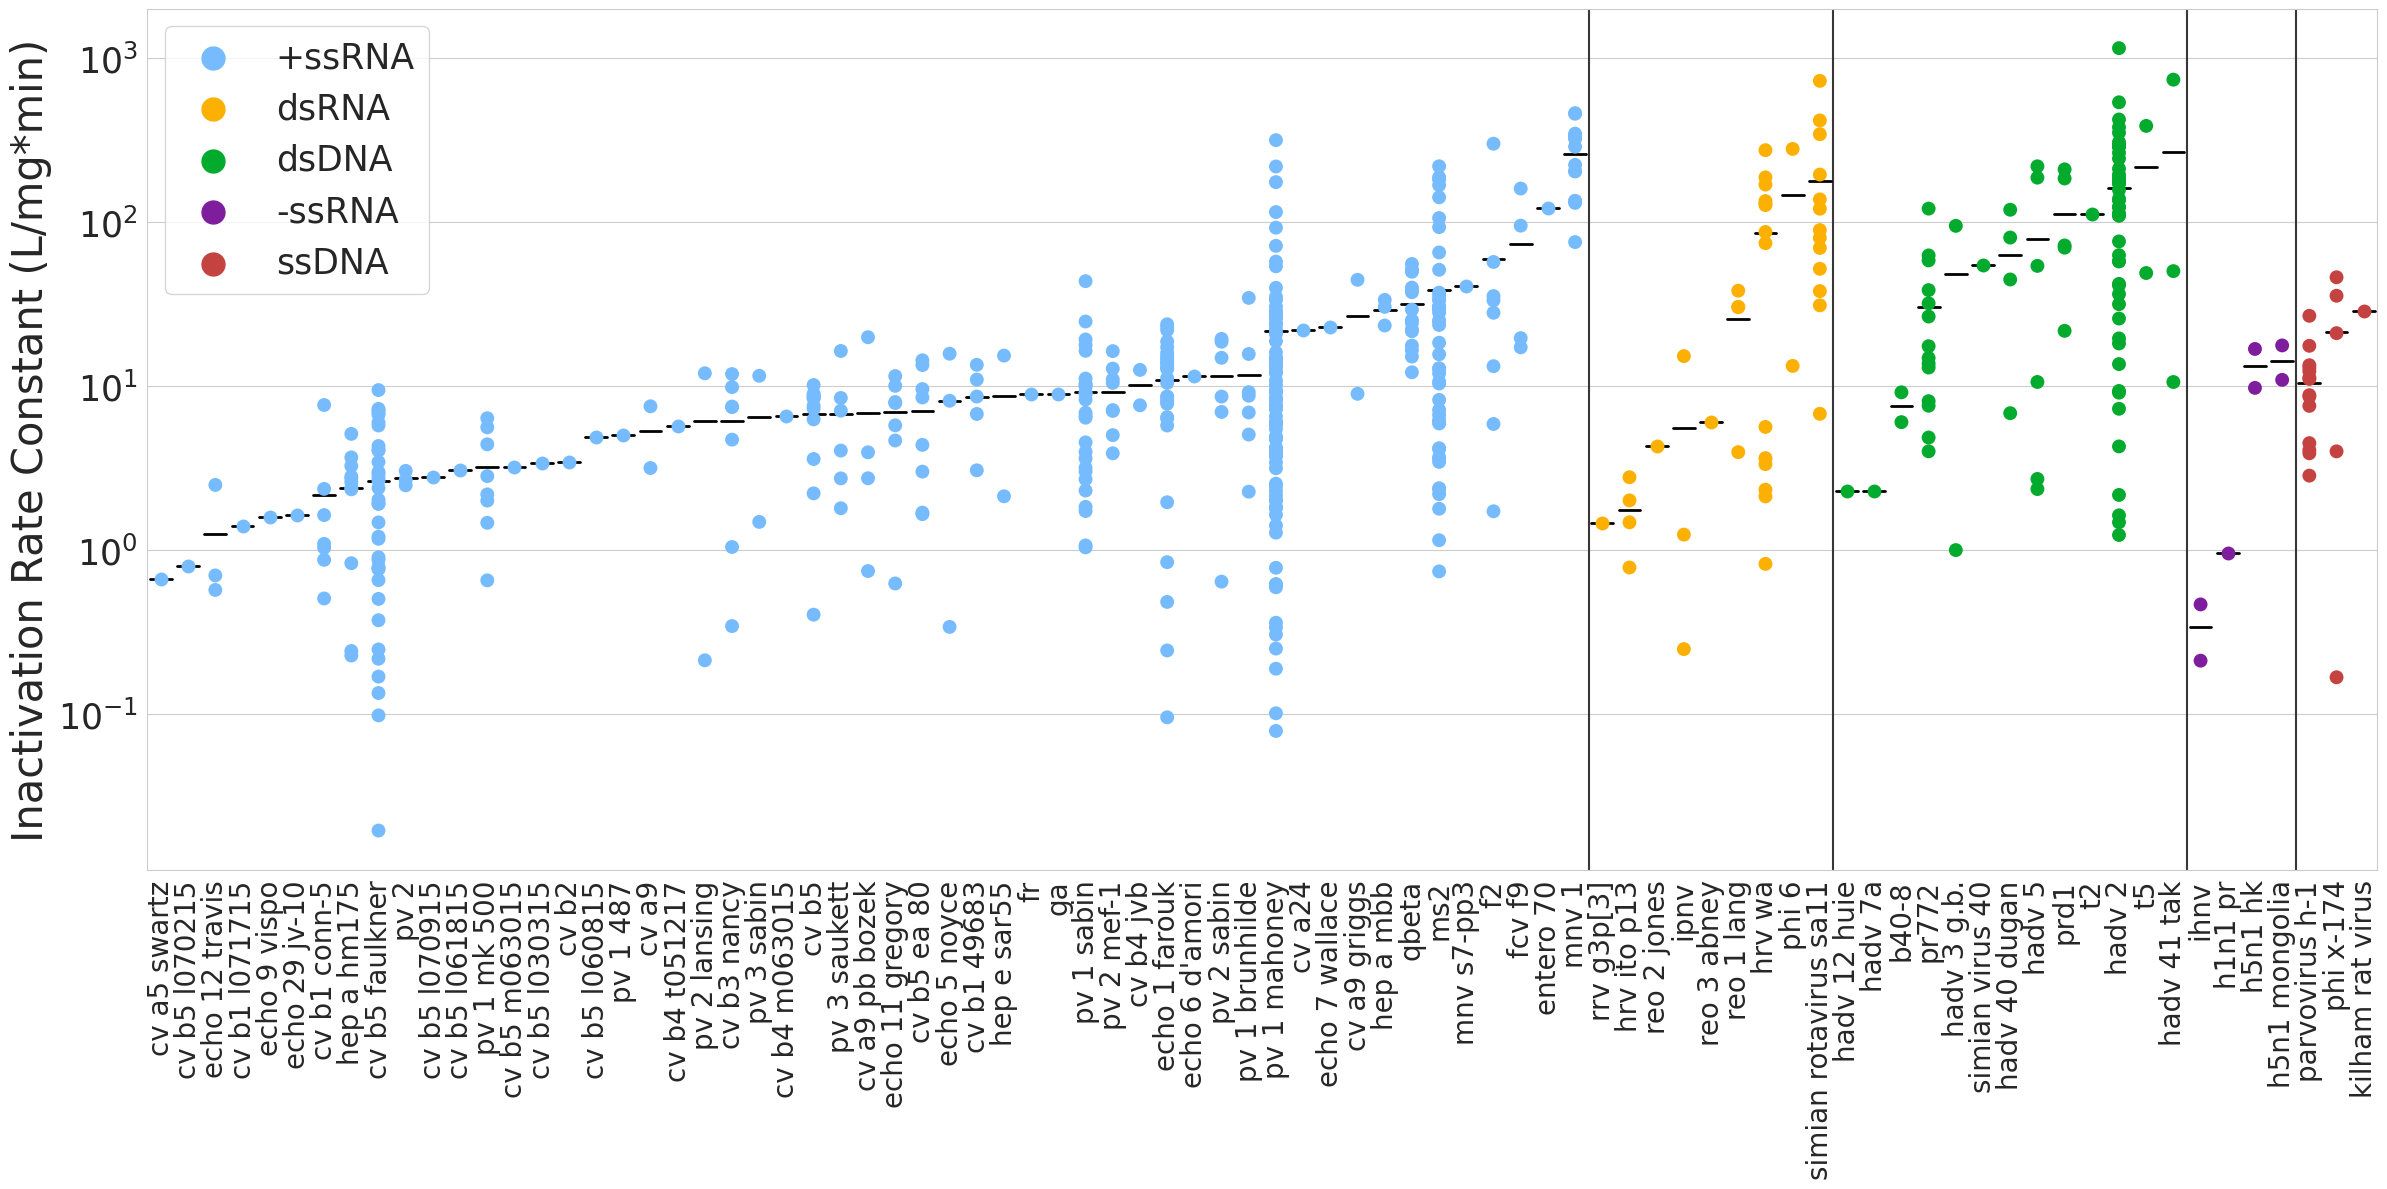

In [24]:
#strip plot with everything
sns.set_style("whitegrid")
from google.colab import files

merged_dataset_strip = merged_dataset.copy()
k_to_use = "average_kobs"

#from matplotlib import gridspec

#divide virus by genome type
plus_ssRNA_viruses = merged_dataset_strip.loc[merged_dataset_strip['balt_class']=='+ssRNA']
plus_ssRNA_ordered_mean = plus_ssRNA_viruses.groupby('virus_name_strain').agg(np.mean)[k_to_use].sort_values(ascending = True)
order1 = plus_ssRNA_ordered_mean.index.tolist()


dsRNA_viruses = merged_dataset_strip.loc[merged_dataset_strip['balt_class']=='dsRNA']
dsRNA_ordered_mean = dsRNA_viruses.groupby('virus_name_strain').agg(np.mean)[k_to_use].sort_values(ascending = True)
order2 = dsRNA_ordered_mean.index.tolist()


dsDNA_viruses = merged_dataset_strip.loc[merged_dataset_strip['balt_class']=='dsDNA']
dsDNA_ordered_mean = dsDNA_viruses.groupby('virus_name_strain').agg(np.mean)[k_to_use].sort_values(ascending = True)
order3 = dsDNA_ordered_mean.index.tolist()

neg_ssRNA_viruses = merged_dataset_strip.loc[merged_dataset_strip['balt_class']=='-ssRNA']
neg_ssRNA_viruses_ordered_mean = neg_ssRNA_viruses.groupby('virus_name_strain').agg(np.mean)[k_to_use].sort_values(ascending = True)
order4 = neg_ssRNA_viruses_ordered_mean.index.tolist()

ssDNA_viruses = merged_dataset_strip.loc[merged_dataset_strip['balt_class']=='ssDNA']
ssDNA_viruses_ordered_mean = ssDNA_viruses.groupby('virus_name_strain').agg(np.mean)[k_to_use].sort_values(ascending = True)
order5 = ssDNA_viruses_ordered_mean.index.tolist()


order = order1 + order2 + order3 + order4 + order5

#make  stripplot
f, ax = plt.subplots( figsize=(24, 12))
ax.set_yscale("log")
D_id_color = {'+ssRNA': u'#75bbfd', 'dsRNA': u'#fcb001', 'dsDNA': u'#02ab2e', '-ssRNA': u'#7e1e9c', 'ssDNA': u'#c44240'}
sns.stripplot(s = 10, data = merged_dataset_strip, x = "virus_name_strain", y = k_to_use, order = order, jitter = False, palette=D_id_color, hue = 'balt_class')
#palette=D_id_color

#scale_color_manual(breaks = c("+ssRNA", "dsRNA", "dsDNA","-ssRNA","ssDNA"),
#                      values=c("#75bbfd", "#fcb001", "#02ab2e",  "#7e1e9c", "#c44240")) +


sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            order=order,
            x="virus_name_strain",
            y=k_to_use,
            data=merged_dataset_strip,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

#labels and legends
ylabel ="Inactivation Rate Constant (L/mg*min)"
plt.xticks(rotation=90, size = 20)
plt.yticks(size = 25)
ax.set_ylabel(ylabel, fontsize=30)
#ax.legend(  fontsize=20)


plt.rcParams["legend.markerscale"] = 2.75
plt.legend(loc="upper left",  fontsize=25)


ax.set(xlabel=None)
#plt.title('Summary of Virus Inactivation Rates', fontsize = 35)

plt.axvline(52.5, color = 'xkcd:dark grey')
plt.axvline(61.5, color = 'xkcd:dark grey')
plt.axvline(74.5, color = 'xkcd:dark grey')
plt.axvline(78.5, color = 'xkcd:dark grey')


plt.tight_layout()

#plt.savefig("virus_k_stripplot_below_pH8point5.png")
#files.download("virus_k_stripplot_below_pH8point5.png")


#For Table 1: Number of Rate Constants for Waterborne Viruses of Concern

In [25]:
(np.unique(merged_dataset['genus']))

pd.pivot_table(data = merged_dataset, index = 'family', aggfunc=lambda x: len(x))

adenoviruses = merged_dataset[merged_dataset['genus']=='Mastadenovirus']
print("Mastadenovirus")
print((np.unique(adenoviruses['virus_name_strain'])))
print(len(np.unique(adenoviruses['virus_name_strain'])))
print(len(adenoviruses['virus_name_strain']))

norovirus = merged_dataset[merged_dataset['genus']=='Norovirus']
print("Norovirus")
print((np.unique(norovirus['virus_name_strain'])))
print(len(np.unique(norovirus['virus_name_strain'])))
print(len(norovirus['virus_name_strain']))


enteroviruses = merged_dataset[merged_dataset['genus']=='Enterovirus']
print("Enterovirus")
print((np.unique(enteroviruses['virus_name_strain'])))
print(len(np.unique(enteroviruses['virus_name_strain'])))
print(len(enteroviruses['virus_name_strain']))

hepatovirus = merged_dataset[merged_dataset['genus']=='Hepatovirus']
print("Hepatovirus")
print((np.unique(hepatovirus['virus_name_strain'])))
print(len(np.unique(hepatovirus['virus_name_strain'])))
print(len(hepatovirus['virus_name_strain']))


rotavirus = merged_dataset[merged_dataset['genus']=='Rotavirus']
print("Rotavirus")
print((np.unique(rotavirus['virus_name_strain'])))
print(len(np.unique(rotavirus['virus_name_strain'])))
print(len(rotavirus['virus_name_strain']))

orthoreovirus = merged_dataset[merged_dataset['genus']=='Orthoreovirus']
print("Orthoreovirus")
print((np.unique(orthoreovirus['virus_name_strain'])))
print(len(np.unique(orthoreovirus['virus_name_strain'])))
print(len(orthoreovirus['virus_name_strain']))



Mastadenovirus
['hadv 12 huie' 'hadv 2' 'hadv 3 g.b.' 'hadv 40 dugan' 'hadv 41 tak'
 'hadv 5' 'hadv 7a']
7
63
Norovirus
['mnv 1' 'mnv s7-pp3']
2
15
Enterovirus
['cv a24' 'cv a5 swartz' 'cv a9' 'cv a9 griggs' 'cv a9 pb bozek'
 'cv b1 49683' 'cv b1 conn-5' 'cv b1 l071715' 'cv b2' 'cv b3 nancy'
 'cv b4 jvb' 'cv b4 m063015' 'cv b4 t051217' 'cv b5' 'cv b5 ea 80'
 'cv b5 faulkner' 'cv b5 l030315' 'cv b5 l060815' 'cv b5 l061815'
 'cv b5 l070215' 'cv b5 l070915' 'cv b5 m063015' 'echo 1 farouk'
 'echo 11 gregory' 'echo 12 travis' 'echo 29 jv-10' 'echo 5 noyce'
 "echo 6 d'amori" 'echo 7 wallace' 'echo 9 vispo' 'entero 70' 'pv 1 487'
 'pv 1 brunhilde' 'pv 1 mahoney' 'pv 1 mk 500' 'pv 1 sabin' 'pv 2'
 'pv 2 lansing' 'pv 2 mef-1' 'pv 2 sabin' 'pv 3 sabin' 'pv 3 saukett']
42
299
Hepatovirus
['hep a hm175' 'hep a mbb']
2
14
Rotavirus
['hrv ito p13' 'hrv wa' 'rrv g3p[3]' 'simian rotavirus sa11']
4
32
Orthoreovirus
['reo 1 lang' 'reo 2 jones' 'reo 3 abney']
3
6


#Figure S5.1: Heatmaps

In [26]:
from matplotlib.colors import LogNorm

In [27]:
#heatmap by full pH value
merged_dataset_range_pH1s = merged_dataset.copy()

merged_dataset_range_pH1s['pH'].replace(to_replace=[4.5, 5],value="4-5", inplace = True)
merged_dataset_range_pH1s['pH'].replace(to_replace=[5.1,5.4, 5.6,5.7,6],value="5-6", inplace = True)
merged_dataset_range_pH1s['pH'].replace(to_replace=[6.3,6.5,6.52, 6.7, 6.8, 6.9,7],value="6-7", inplace = True)
merged_dataset_range_pH1s['pH'].replace(to_replace=[7.1, 7.2, 7.3, 7.4, 7.5,7.6, 7.8,8],value="7-8", inplace = True)
merged_dataset_range_pH1s['pH'].replace(to_replace=[8.1, 8.2, 8.3, 8.5, 8.7,9],value="8-9", inplace = True)
merged_dataset_range_pH1s['pH'].replace(to_replace=[9.2, 9.6,9.8,9.9,10],value="9-10", inplace = True)

plt.style.use("seaborn")

heatmap_data_pH1s = pd.pivot_table(merged_dataset_range_pH1s, values='sample_ID', index='pH', columns = 'balt_class',
                    aggfunc=lambda x: len(x))

# Plot the heatmap
#plt.figure(figsize=(10,10))
#heat_map = sns.heatmap( heatmap_data_pH1s, linewidth = 1 , annot = True, fmt ='.3g', cmap = 'crest', norm=LogNorm(), vmin =0, vmax = 100)
#heat_map.set_facecolor('xkcd:light grey')
#plt.title( "Number of Available Rate Constants" )
#plt.show()

<ipython-input-27-e92663cbc60b>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [28]:
plt.style.use("seaborn")

heatmap_data_chloride = pd.pivot_table(merged_dataset, values='sample_ID', index='high_chloride', columns = 'balt_class',
                    aggfunc=lambda x: len(x))

# Plot the heatmap
#plt.figure()
#heat_map = sns.heatmap( heatmap_data_chloride, linewidth = 1 , annot = True, fmt ='.3g', cmap = 'crest', norm=LogNorm())

#plt.title( "Number of Available Rate Constants" )
#plt.show()

<ipython-input-28-35a0635d56ee>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [29]:
#heatmap by 10, starting at 5s

#https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

from matplotlib.colors import LogNorm


merged_dataset_range_10temp = merged_dataset.copy()

merged_dataset_range_10temp['temp'].replace(to_replace=[0,1,2,3,4,5],value="0 - 5", inplace = True)
merged_dataset_range_10temp['temp'].replace(to_replace=[10, 14, 15],value="5-15", inplace = True)
merged_dataset_range_10temp['temp'].replace(to_replace=[16,17,18,20, 21,22,22.5,23.5,25],value="15-25", inplace = True)
merged_dataset_range_10temp['temp'].replace(to_replace=[ 25.5,26.5,30, 35],value="25-35", inplace = True)

plt.style.use("seaborn")

heatmap_data_temp_10deg = pd.pivot_table(merged_dataset_range_10temp, values='sample_ID', index='temp', columns = 'balt_class',
                    aggfunc=lambda x: len(x))

heatmap_data_temp_10deg = heatmap_data_temp_10deg.reindex(["0 - 5", "5-15", "15-25", "25-35"])


# Plot the heatmap
#plt.figure(figsize=(10,10))
#heatmap_temp_10deg = sns.heatmap( heatmap_data_temp_10deg, linewidth = 1 , annot = True, fmt ='.3g', cmap = 'BuGn', norm=LogNorm())
#plt.title( "Number of Available Rate Constants" )
#plt.show()




<ipython-input-29-c499ff91a11f>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


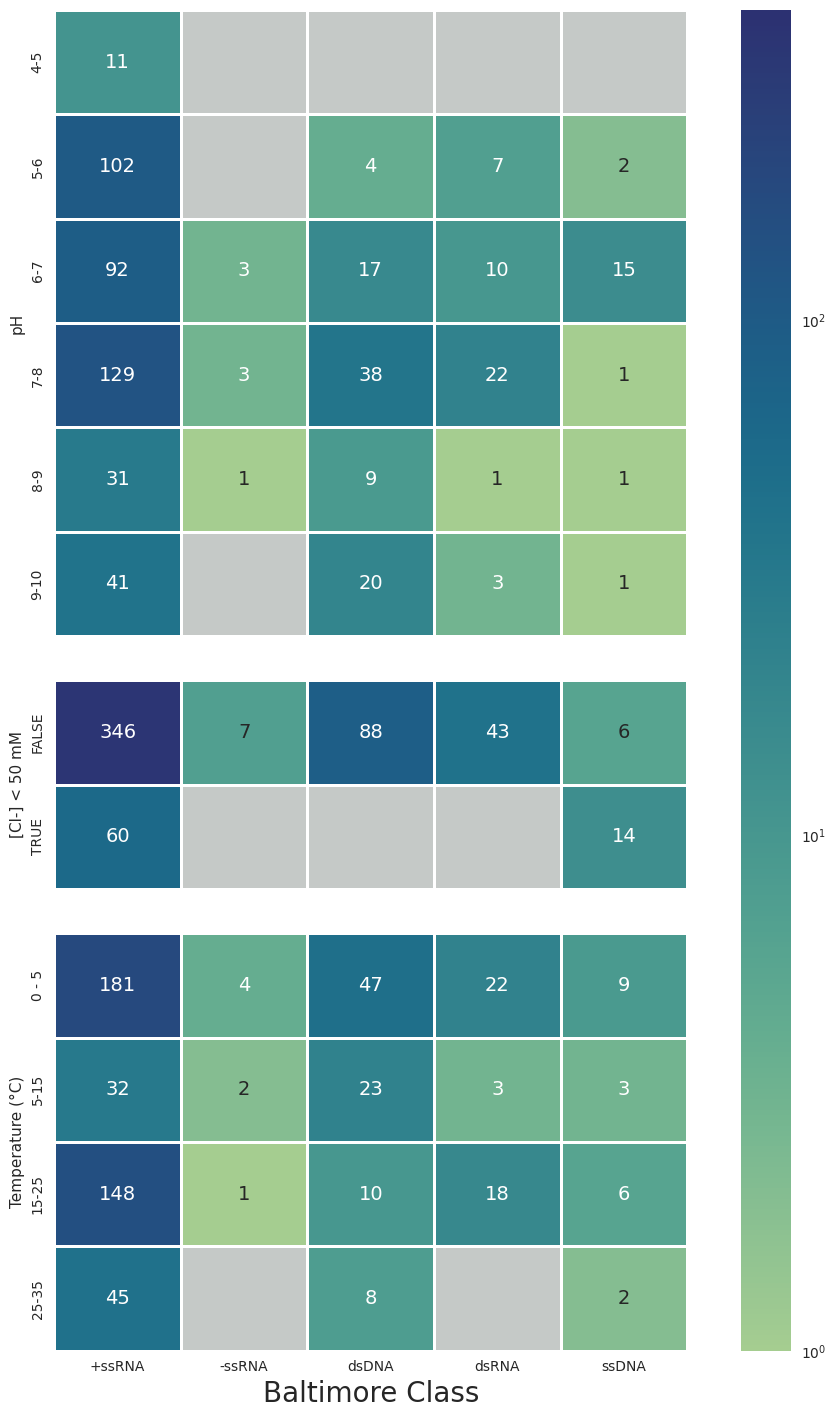

In [30]:
f, ax = plt.subplot_mosaic([['upper left', 'right'],
                  ['middle left', 'right'],
                   ['lower left', 'right']],
                              figsize=(8, 14), gridspec_kw={'height_ratios': [3, 1, 2], 'width_ratios':[1, 0.08]})

plt.tight_layout()


sns.set(font_scale=1.3)
#f, ax = plt.subplots( figsize=(20, 12))
#ax[0].set_ylim(1e-2, 1e3)
heat_map_pH = sns.heatmap( heatmap_data_pH1s, ax = ax['upper left'], linewidth = 1 , annot = True, fmt ='.3g', cmap = 'crest', norm = LogNorm(),cbar=False, xticklabels='',  annot_kws={"fontsize":14})
ax['upper left'].set_facecolor('xkcd:silver')
ax['upper left'].set_xlabel('')
ax['upper left'].set_ylabel('pH')
ax['upper left'].collections[0].set_clim(1,400)
ax['upper left'].grid(False)



#sns.stripplot(ax = ax[0], s = 15, data = plus_ssRNA_viruses, x = "virus_name_strain", y = k_to_use, order = order, jitter = False, palette="muted", hue = 'family')

heat_map_chloride = sns.heatmap( heatmap_data_chloride, ax = ax['middle left'], linewidth = 1 , annot = True, fmt ='.3g', cmap = 'crest', norm = LogNorm(), cbar=False, xticklabels='',  annot_kws={"fontsize":14})
ax['middle left'].set_facecolor('xkcd:silver')
ax['middle left'].set_xlabel('')
ax['middle left'].set_ylabel('[Cl-] < 50 mM')
ax['middle left'].collections[0].set_clim(1,400)
ax['middle left'].grid(False)


heatmap_10deg = sns.heatmap( heatmap_data_temp_10deg, ax = ax['lower left'], linewidth = 1 , annot = True, fmt ='.3g', cmap = 'crest',  norm = LogNorm(), cbar_ax=ax['right'],  annot_kws={"fontsize":14})
ax['lower left'].set_facecolor('xkcd:silver')
ax['lower left'].set_xlabel('Baltimore Class', size = 20)
ax['lower left'].set_ylabel('Temperature (°C)')
ax['lower left'].collections[0].set_clim(1,400)
ax['lower left'].grid(False)




#Figure S6.1 Data Comparison under Narrowed Environmental Conditions


In [31]:
merged_dataset_limited = merged_dataset.copy()

#set temperature limit
temp_min = 15
temp_max = 25
merged_dataset_limited = merged_dataset_limited[merged_dataset_limited["temp"]>=temp_min]
merged_dataset_limited = merged_dataset_limited[merged_dataset_limited["temp"]<=temp_max]
print(f"Temperatures between {temp_min} and {temp_max}")


#set pH limit
pH_min = 6
pH_max = 7
merged_dataset_limited = merged_dataset_limited[merged_dataset_limited["pH"]>=pH_min]
merged_dataset_limited = merged_dataset_limited[merged_dataset_limited["pH"]<=pH_max]
print(f"pH values between {pH_min} and {pH_max}")

print(f"{len(merged_dataset_limited)} data points included")
print(f"{len(merged_dataset)} data points included in base")
print(f"{len(np.unique(merged_dataset_limited['virus_name_strain']))} viruses included")



Temperatures between 15 and 25
pH values between 6 and 7
94 data points included
564 data points included in base
28 viruses included


<ipython-input-32-dc35148f9f5c>:10: FutureWarning: The operation <function mean at 0x78a6b4d14160> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  all_viruses_ordered_mean = all_viruses.groupby('virus_name_strain').agg(np.mean)[k_to_use].sort_values(ascending = True)
<ipython-input-32-dc35148f9f5c>:60: FutureWarning: The operation <function mean at 0x78a6b4d14160> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  all_viruses_ordered_mean_2 = all_viruses_2.groupby('virus_name_strain').agg(np.mean)[k_to_use].sort_values(ascending = True)


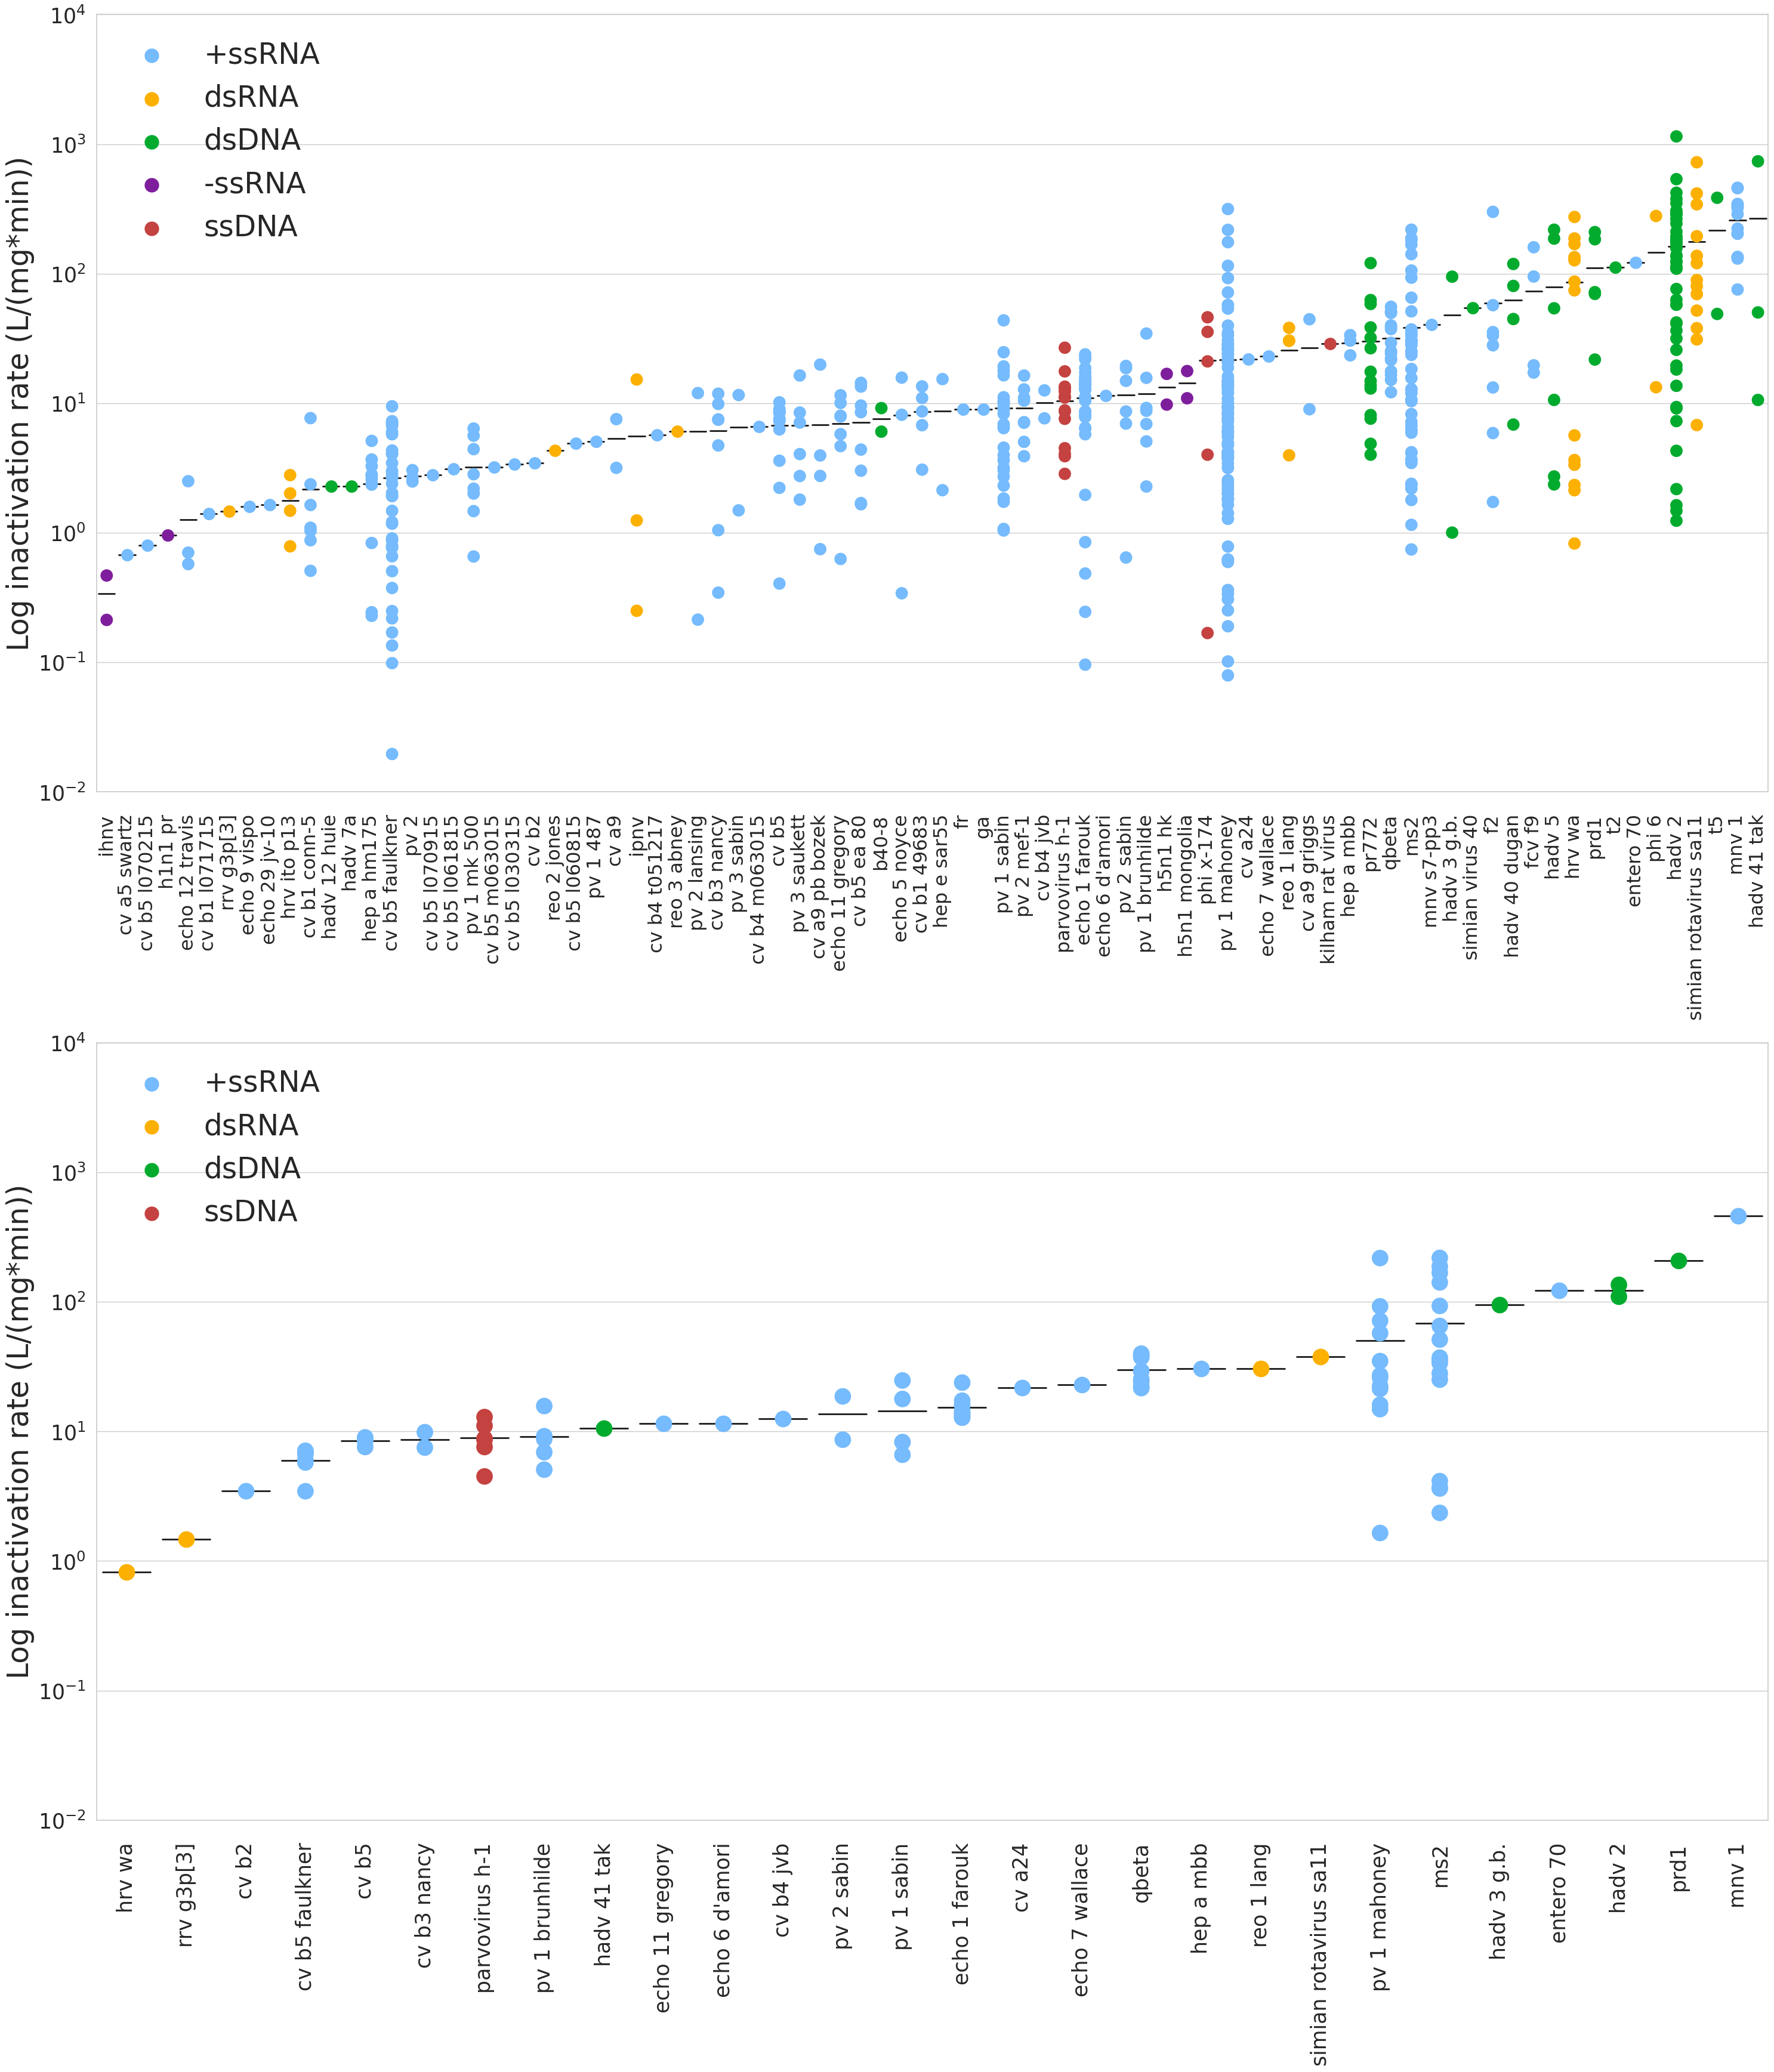

In [32]:
#two conditions plotted together
sns.set_style("whitegrid")

merged_dataset_strip = merged_dataset
k_to_use = "average_kobs"

############### plot all viruses
#divide virus by genome type
all_viruses = merged_dataset_strip
all_viruses_ordered_mean = all_viruses.groupby('virus_name_strain').agg(np.mean)[k_to_use].sort_values(ascending = True)
order = all_viruses_ordered_mean.index.tolist()

#make  stripplot
f, ax = plt.subplots(2,1,  figsize=(30, 35))
#f, ax = plt.subplots( figsize=(20, 12))
ax[0].set_yscale("log")
ax[0].set_ylim(1e-2, 1e4)
D_id_color = {'+ssRNA': u'#75bbfd', 'dsRNA': u'#fcb001', 'dsDNA': u'#02ab2e', '-ssRNA': u'#7e1e9c', 'ssDNA': u'#c44240'}
sns.stripplot(ax = ax[0], s = 15, data = all_viruses, x = "virus_name_strain", y = k_to_use, order = order, jitter = False, palette=D_id_color, hue = 'balt_class')

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            order=order,
            x="virus_name_strain",
            y=k_to_use,
            data=all_viruses,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax[0])

#labels and legends
ylabel ="Log inactivation rate (L/(mg*min))"
ax[0].tick_params(axis="x", rotation=90, size = 20, labelsize = 23)
ax[0].tick_params(axis="y", labelsize = 25)
#ax[0].set_xticklabels(plus_ssRNA_viruses['virus_name_strain'], Fontsize= 20)
ax[0].set_ylabel(ylabel, fontsize=35)
ax[0].legend( prop={'size': 35})
ax[0].set(xlabel=None)
#ax[0].set_title('All conditions')
#plt.title('Summary of Virus Inactivation Rates', fontsize = 35)

plt.tight_layout()



################ cond 2

k_to_use = "average_kobs"

#make names shorter

#from matplotlib import gridspec

#divide virus by genome type
all_viruses_2 = merged_dataset_limited
all_viruses_ordered_mean_2 = all_viruses_2.groupby('virus_name_strain').agg(np.mean)[k_to_use].sort_values(ascending = True)
order2 = all_viruses_ordered_mean_2.index.tolist()

order = order2

#make  stripplot
ax[1].set_yscale("log")
ax[1].set_ylim(1e-2, 1e4)
D_id_color = {'+ssRNA': u'#75bbfd', 'dsRNA': u'#fcb001', 'dsDNA': u'#02ab2e', '-ssRNA': u'#7e1e9c', 'ssDNA': u'#c44240'}
sns.stripplot(ax = ax[1], s = 20, data = all_viruses_2, x = "virus_name_strain", y = k_to_use, order = order, jitter = False, palette=D_id_color, hue = 'balt_class')

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            order=order,
            x="virus_name_strain",
            y=k_to_use,
            data=all_viruses_2,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax[1])

#labels and legends
ylabel ="Log inactivation rate (L/(mg*min))"
ax[1].tick_params(axis="x", rotation=90, size = 20, labelsize = 25)
ax[1].tick_params(axis="y", labelsize = 25)
ax[1].set_ylabel(ylabel, fontsize=35)
ax[1].legend( prop={'size': 35})
ax[1].set(xlabel=None)
#ax[1].set_title('Condition Set 2')

#plt.title('Summary of Virus Inactivation Rates', fontsize = 35)

plt.tight_layout()

plt.savefig("all_cond.png")
#files.download("all_cond.png")


##Text on Narrowed Environmental Conditions from Section 3.1

In [33]:
#merged_dataset.groupby('virus_name_strain').agg('count')['temp'].sort_values

#make a function to sort dataset by whatever parameters provided above, print plots
ms2_rates_orig = merged_dataset[merged_dataset['virus_name_strain']=='ms2']
ms2_rates_limited = merged_dataset_limited[merged_dataset_limited['virus_name_strain']=='ms2']

point_num = len(ms2_rates_limited)
print(f" number of points (limited): {point_num}")

paper_num = len(ms2_rates_limited.groupby('paper_ID').agg('count'))
print(f" number of papers (limited): {paper_num}")

mean_k = np.mean(ms2_rates_orig['average_kobs'])
print(f" mean k value (orig): {mean_k}")

mean_k = np.mean(ms2_rates_limited['average_kobs'])
print(f" mean k value (limited): {mean_k}")

mean_std = np.std(ms2_rates_orig['average_kobs'])
print(f" ms2 standard deviation of k value (orig): {mean_std}")

mean_std = np.std(ms2_rates_limited['average_kobs'])
print(f" ms2 standard deviation of k value (limited): {mean_std}")


pv1_rates_orig = merged_dataset[merged_dataset['virus_name_strain']=='pv 1 mahoney']
pv1_rates_limited = merged_dataset_limited[merged_dataset_limited['virus_name_strain']=='pv 1 mahoney']
mean_std = np.std(pv1_rates_orig['average_kobs'])
print(f" pv 1 mahoney standard deviation of k value (orig): {mean_std}")

mean_std = np.std(pv1_rates_limited['average_kobs'])
print(f" pv 1 mahoney standard deviation of k value (limited): {mean_std}")



 number of points (limited): 16
 number of papers (limited): 6
 mean k value (orig): 38.401781719991305
 mean k value (limited): 68.6266784608125
 ms2 standard deviation of k value (orig): 54.494344460513844
 ms2 standard deviation of k value (limited): 69.1392310123011
 pv 1 mahoney standard deviation of k value (orig): 46.414572700487284
 pv 1 mahoney standard deviation of k value (limited): 56.379100800310844


# Table S8.1 Genome Length and Diameter by Baltimore Class

In [34]:
included_virus_data = merged_dataset.groupby('virus_name_strain').first()[['balt_class','genome_length','diameter']]

#mean, max, and min diameters for viruses in dataset
print('mean, maximum, and minimum diameters for viruses in dataset')
print(pd.pivot_table(data = included_virus_data, index = 'balt_class', values = 'diameter', aggfunc = ('mean','min','max'), sort = True ))

print('mean, maximum, and minimum genome lengths for viruses in dataset')
#mean, max, and min genome lengths for viruses in dataset
print(pd.pivot_table(data = included_virus_data, index = 'balt_class', values = 'genome_length', aggfunc = ('mean','min','max'), sort = True ))



mean, maximum, and minimum diameters for viruses in dataset
              max        mean     min
balt_class                           
+ssRNA       41.6   29.842264   25.84
-ssRNA      120.0  105.000000  100.00
dsDNA       131.0   81.561538   45.00
dsRNA        80.0   77.777778   65.00
ssDNA        26.0   24.666667   24.00
mean, maximum, and minimum genome lengths for viruses in dataset
               max          mean    min
balt_class                             
+ssRNA        7690   7025.320755   3466
-ssRNA       13585  12971.500000  11131
dsDNA       163825  46929.384615   5243
dsRNA        23606  14383.444444   1424
ssDNA         5386   5163.000000   4927


In [35]:
merged_dataset.groupby('paper_ID').agg(lambda x: ','.join(x.unique()))

<ipython-input-35-e1c1931f5148>:1: FutureWarning: ['temp', 'pH', 'average_kobs', 'diameter', 'genome_length'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  merged_dataset.groupby('paper_ID').agg(lambda x: ','.join(x.unique()))


,virus_name_strain,purification_level,sample_ID,year,author_list,buffer_type,corr_author,high_chloride,buffer_description,alpha_0,...,A_percentage,T_percentage,U_percentage,T_is_0,U_is_0,log_average_kobs,year_float,year_int,float_year_scaled,int_year_scaled
paper_ID,,,,,,,,,,,,,,,,,,,,,
10,"cv b1 l071715,cv b4 m063015,cv b4 t051217,cv b...",2,"10-1,10-2,10-3,10-4,10-5,10-6,10-7,10-8,10-9,1...",2018,"['meister_s', 'verbyla_m', 'klinger_m', 'kohn_t']",phosphate saline,kohn_t,FALSE,"phosphate buffered saline (PBS; 5\rmM NaH2PO4,...",0.5742802037,...,"28.401877,28.692276,28.8502,28.32432,28.6435,2...",0,"24.013249,24.351685,23.93654,23.90541,24.31334...",1,0,"0.1461280357,0.8195439355,0.7558748557,0.61278...",2018,2018,2.9,2.9
11,"ms2,mnv 1","2,1","11-1,11-2,11-3,11-4,11-5,11-6",2017,"['dunkin_n', 'weng_s', 'jacangelo_j', 'schwab_k']",lettuce wash water,schwab_k,FALSE,"shredded iceberg, industrial leafy green wash ...","0.9926414473,0.9883874599,0.8711477984",...,"23.39591,21.36277",0,"24.48865,22.66323",1,0,"1.027136381,1.476952145,0.3780106941,2.1164750...",2017,2017,2.8,2.8
12,echo 11 gregory,2,12-1,2017,"['zhong_q', 'carratala_a', 'ossola_r', 'bachma...",phosphate saline,kohn_t,FALSE,"5 mM; Na2HPO4 (99%, Acros), 10 mM NaCl (99.5%,...",0.5742802037,...,28.09895,0,23.75639,1,0,0.8971841583,2017,2017,2.8,2.8
13,hrv wa,2,"13-1,13-2,13-3",2017,"['xue_b', 'li_c', 'zhang_b', 'zhao_t', 'shen_z...","surface water,tap water,phosphate saline","wang_j, li_j",FALSE,collected from Haiher river Tianjin and filter...,"0.8100951586,0.6813218352",...,30.547753,0,28.651685,1,0,"-0.08309414096,0.3282792916,0.368919375",2017,2017,2.8,2.8
14,pr772,2,"14-1,14-2,14-3,14-4,14-5,14-6,14-7,14-8,14-9,1...",2016,"['gall_a', 'shisler_j', 'mariñas_b']",carbonate,mariñas_b,FALSE,1 mM carbonate buffer solution,"0.02093210052,0.008439548177,0.003376998798,0....",...,26.39502,25.26428,0,0,1,"1.76614804,1.424198494,1.113311677,2.081571614...",2016,2016,2.7,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,"pv 1 mahoney,pv 1 sabin",1,"79-1,79-2,79-3,79-4,79-5,79-6",1980,"['shaffer_p', 'metcalf_t', 'sproul_o']",calcium,shaffer_p,FALSE,".01 M calcium chloride in demand freee water, ...",0.7291099629,...,"29.65054,29.70031",0,"24.00538,24.02903",1,0,"1.417179297,1.108828767,0.7635125779,1.2153228...",1980,1980,-0.9,-0.9
8,phi 6,1,8-1,2018,"['ye_y', 'chang_p', 'hartert_j', 'wigginton_k']",phosphate saline,wigginton_k,FALSE,"5 mM phosphate buffer (PBS;\r10 mM NaCl, pH 7.4)",0.5742802037,...,20.149421,0,24.034367,1,0,2.445284538,2018,2018,2.9,2.9
80,"f2,pv 1 sabin",1,"80-1,80-2,80-3,80-4,80-5,80-6",1982,"['taylor_g', 'butler_m']",ultrapure,taylor_g,FALSE,,"0.9970574748,0.7721286735,0.03277389145",...,"23.39591,29.70031",0,"24.48865,24.02903",1,0,"1.522636559,1.121530299,0.2375160912,0.2388800...",1982,1982,-0.7,-0.7


In [36]:
(np.unique(merged_dataset['paper_ID']))

array(['10', '11', '12', '13', '14', '15', '16', '17', '18', '2', '20',
       '21', '22', '23', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '43',
       '44', '45', '46', '48', '49', '5', '50', '51', '53', '54', '55',
       '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '7', '71', '72', '74', '75', '76', '77',
       '78', '79', '8', '80', '81', '9'], dtype=object)